PROJECT

In [10]:
import pandas as pd


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
! pip install openpyxl


In [13]:
import openpyxl


LOADING DATASETS

In [15]:
file_path = 'Assignment.xlsx'
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')


PREVIEW OF DATASET

In [16]:
order_details.head()



,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


Preview the datasets


In [17]:
cooking_sessions.head()


,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [18]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


DATA CLEANING

Checking Datatype of column null or not

In [19]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [20]:
cooking_sessions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [21]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes


In [22]:
duplicated_rows1=order_details[order_details.duplicated()]
print(duplicated_rows1)

Empty DataFrame
Columns: [Order ID, User ID, Order Date, Meal Type, Dish Name, Order Status, Amount (USD), Time of Day, Rating, Session ID]
Index: []


# Checking for the duplicate Entries

In [23]:
order_duplicates = order_details.duplicated().sum()
print(f"Number of duplicate rows: {order_duplicates}")


Number of duplicate rows: 0


In [24]:
user_duplicates = user_details.duplicated().sum()
print(f"Number of duplicate rows: {user_duplicates}")

Number of duplicate rows: 0


In [25]:
cooking_duplicates = cooking_sessions.duplicated().sum()
print(f"Number of duplicate rows: {cooking_duplicates}")

Number of duplicate rows: 0


INSIGHTS:
 1.There are no duplicate values and no missing values as such

Merging Data

In [26]:
merged_df_1 = pd.merge(cooking_sessions, user_details, how='inner', on='User ID')





In [27]:
final_df = pd.merge(merged_df_1, order_details, how='inner',  on=['User ID', 'Session ID'])

In [28]:
final_df.head()

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


Output of data

In [116]:
final_df.to_excel("output.xlsx", index=False)
print("DataFrame has been saved to 'output.xlsx'")

DataFrame has been saved to 'output.xlsx'


In [30]:
final_df.describe()

,Session Start,Session End,Duration (mins),Session Rating,Age,Registration Date,Total Orders,Order ID,Order Date,Amount (USD),Rating
count,16,16,16.000000,16.000000,16.000000,16,16.000000,16.000000,16,16.000000,14.000000
mean,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,32.687500,2023-03-31 16:30:00,10.562500,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,25.000000,2023-01-15 00:00:00,5.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,28.000000,2023-02-20 00:00:00,8.000000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,30.500000,2023-03-10 00:00:00,10.000000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,35.750000,2023-05-22 00:00:00,12.500000,1012.250000,2024-12-06 06:00:00,13.125000,4.750000
max,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,42.000000,2023-08-11 00:00:00,15.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,NaN,NaN,10.873324,0.292617,5.839164,NaN,3.119161,4.760952,NaN,2.435843,0.468807


In [43]:
final_df.head()

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [112]:
final_df=pd.read_excel('output.xlsx')

In [113]:
final_df

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,Bob Smith,35,...,Lunch,8,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,Emma White,30,...,Lunch,9,1007,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,Charlie Lee,42,...,Breakfast,15,1008,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,Alice Johnson,28,...,Dinner,12,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,Bob Smith,35,...,Lunch,8,1010,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0


Removing unnecessary column (Email, Phone Number)  and using standard name for easy integration (Meal Type_x= Meal Type)

In [117]:
final_df.drop(['Email', 'Phone'], axis=1, inplace=True)

In [119]:
final_df.drop(['Meal Type_y', 'Dish Name_y'], axis=1, inplace=True)

In [120]:
final_df.rename(columns={'Meal Type_x': 'meal type'}, inplace=True)

In [121]:
final_df.rename(columns={'Dish Name_x': 'Dish Name'}, inplace=True)

In [122]:
final_df.rename(columns={'Rating': 'Food Rating'}, inplace=True)

In [124]:
data_cleaned = pd.read_excel("cleaned_output.xlsx")

In [123]:
data_cleaned.to_excel("cleaned_output.xlsx", index=False)

Data is Cleaned

#ANALYSIS

Popular dishes or meal types

In [48]:

dish_popularity = data_cleaned["Favorite Meal"].value_counts()
print("Most popular dishes or meal types:")
print(dish_popularity)

Most popular dishes or meal types:
Favorite Meal
Dinner       7
Lunch        5
Breakfast    4
Name: count, dtype: int64


Peak times for orders

In [49]:
data_cleaned["Order Hour"] = data_cleaned["Order Date"].dt.hour
peak_times = data_cleaned["Order Hour"].value_counts().sort_index()
print("Peak times for orders:")
print(peak_times)

Peak times for orders:
Order Hour
0    16
Name: count, dtype: int64


Revenue trends based on order status and time of day

In [51]:
revenue_trends = data_cleaned.groupby(["Order Status", "Time of Day"])["Amount (USD)"].sum()
print("Revenue trends based on order status and time of day:")
print(revenue_trends)

Revenue trends based on order status and time of day:
Order Status  Time of Day
Canceled      Day            11.0
              Night          12.5
Completed     Day            39.0
              Morning        23.5
              Night          94.0
Name: Amount (USD), dtype: float64


Demographic patterns in user behavior

In [55]:
demographic_patterns = data_cleaned.groupby("Location")["Total Orders"].mean()
print("Demographic patterns in user behavior (average orders per location):")
print(demographic_patterns)

Demographic patterns in user behavior (average orders per location):
Location
Austin            7.0
Boston           14.0
Chicago          15.0
Los Angeles       8.0
Miami             5.0
New York         12.0
San Francisco    10.0
Seattle           9.0
Name: Total Orders, dtype: float64


 Revenue and Profitability Analysis
# 1. Revenue by Meal Type and Dish Name

In [125]:
revenue_by_meal = data_cleaned.groupby(["Meal Type", "Favorite Meal"])["Amount (USD)"].sum().sort_values(ascending=False)
print("Revenue by Meal Type and Favorite Meal:")
print(revenue_by_meal)

Revenue by Meal Type and Favorite Meal:
Meal Type  Favorite Meal
Dinner     Dinner           52.5
           Lunch            27.5
           Breakfast        26.5
Lunch      Dinner           20.0
           Lunch            19.0
           Breakfast        11.0
Breakfast  Breakfast         8.5
           Dinner            8.0
           Lunch             7.0
Name: Amount (USD), dtype: float64


2.Revenue distribution by Time of Day

In [56]:
revenue_by_time = data_cleaned.groupby("Time of Day")["Amount (USD)"].sum()
print("Revenue distribution by Time of Day:")
print(revenue_by_time)

Revenue distribution by Time of Day:
Time of Day
Day         50.0
Morning     23.5
Night      106.5
Name: Amount (USD), dtype: float64


Revenue is Highest at night

3. Revenue contribution by Order Status

In [57]:
revenue_by_status = data_cleaned.groupby("Order Status")["Amount (USD)"].sum()
print("Revenue contribution by Order Status:")
print(revenue_by_status)

Revenue contribution by Order Status:
Order Status
Canceled      23.5
Completed    156.5
Name: Amount (USD), dtype: float64


4. Meal preferences by user segment

In [68]:
meal_preferences = data_cleaned.groupby(["User Name", "Favorite Meal"]).size().unstack(fill_value=0)
print("Meal preferences by user segment:")
print(meal_preferences)

Meal preferences by user segment:
Favorite Meal  Breakfast  Dinner  Lunch
User Name                              
Alice Johnson          0       3      0
Bob Smith              0       0      3
Charlie Lee            3       0      0
David Brown            0       2      0
Emma White             0       0      2
Frank Green            0       1      0
Grace King             1       0      0
Henry Lee              0       1      0


Average session durations

In [128]:
duration_by_meal = data_cleaned.groupby("Meal Type")["Duration (mins)"].mean()
print("Average session durations by Meal Type:")
print(duration_by_meal)

Average session durations by Meal Type:
Meal Type
Breakfast    23.333333
Dinner       38.750000
Lunch        21.000000
Name: Duration (mins), dtype: float64


 Correlation between session durations and user ratings


In [59]:
 correlation_duration_rating = data_cleaned["Duration (mins)"].corr(data_cleaned["Food Rating"])
print(f"Correlation between session durations and user ratings: {correlation_duration_rating}")

Correlation between session durations and user ratings: 0.689484531558072


Bottlenecks or delays in sessions

In [60]:
peak_hours = data_cleaned.groupby(["Session Start", "Session End"]).size()
print("Peak session hours:")
print(peak_hours)

Peak session hours:
Session Start        Session End        
2024-12-01 12:00:00  2024-12-01 12:20:00    1
2024-12-01 19:00:00  2024-12-01 19:30:00    1
2024-12-02 07:30:00  2024-12-02 08:00:00    1
2024-12-02 19:30:00  2024-12-02 20:10:00    1
2024-12-03 13:00:00  2024-12-03 13:15:00    1
2024-12-03 18:30:00  2024-12-03 19:00:00    1
2024-12-04 13:30:00  2024-12-04 13:50:00    1
2024-12-04 18:00:00  2024-12-04 18:45:00    1
2024-12-05 07:00:00  2024-12-05 07:10:00    1
2024-12-05 19:00:00  2024-12-05 19:40:00    1
2024-12-06 08:00:00  2024-12-06 08:30:00    1
2024-12-06 19:00:00  2024-12-06 19:40:00    1
2024-12-07 12:30:00  2024-12-07 13:00:00    1
2024-12-07 18:00:00  2024-12-07 18:45:00    1
2024-12-08 13:30:00  2024-12-08 13:50:00    1
2024-12-08 19:30:00  2024-12-08 20:10:00    1
dtype: int64


Factors associated with high and low satisfaction

In [130]:

high_rating = data_cleaned[data_cleaned["Food Rating"] >= 4]
low_rating = data_cleaned[data_cleaned["Food Rating"] < 4]

In [131]:
high_rating_trends = high_rating.groupby("Meal Type")["Food Rating"].mean()
low_rating_trends = low_rating.groupby("Meal Type")["Food Rating"].mean()

print("Trends for high ratings by Meal Type:")
print(high_rating_trends)
print("Trends for low ratings by Meal Type:")
print(low_rating_trends)


Trends for high ratings by Meal Type:
Meal Type
Breakfast    4.000000
Dinner       4.571429
Lunch        4.000000
Name: Food Rating, dtype: float64
Trends for low ratings by Meal Type:
Series([], Name: Food Rating, dtype: float64)


#VISUALIZATION

 Customer Segmentation: Bar chart for revenue contributions by age group and preferred meal types

<ipython-input-105-eb42ea9b0da1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Amount (USD)', data=age_group_revenue, palette='viridis')


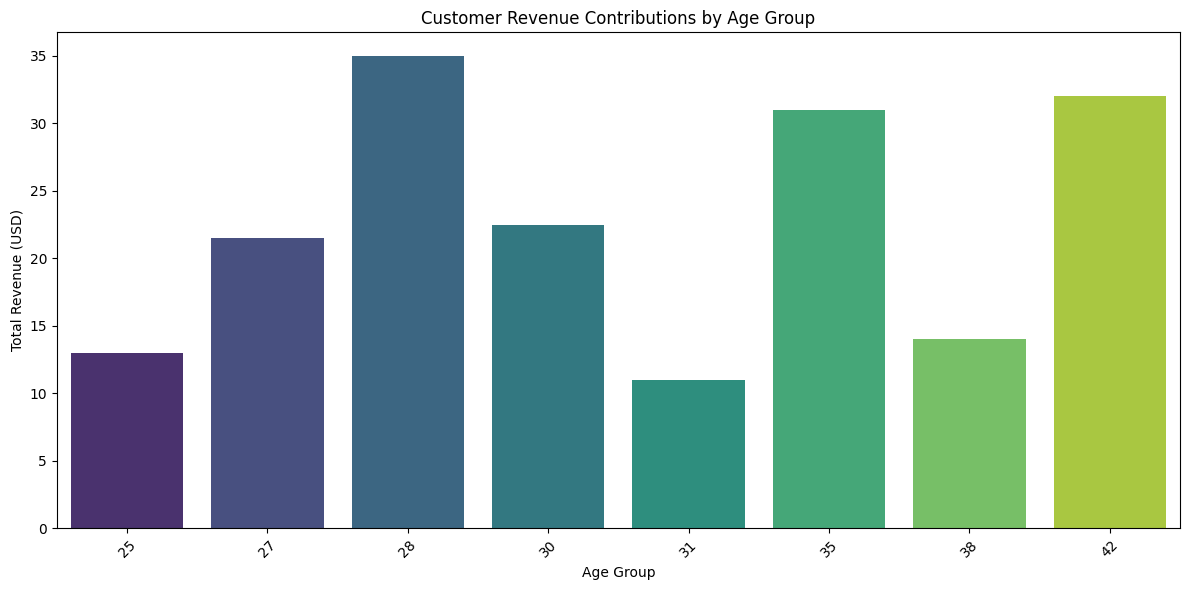

In [105]:
plt.figure(figsize=(12, 6))
age_group_revenue = data_cleaned.groupby('Age')['Amount (USD)'].sum().reset_index()
sns.barplot(x='Age', y='Amount (USD)', data=age_group_revenue, palette='viridis')
plt.title('Customer Revenue Contributions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Revenue distribution by Time of Day

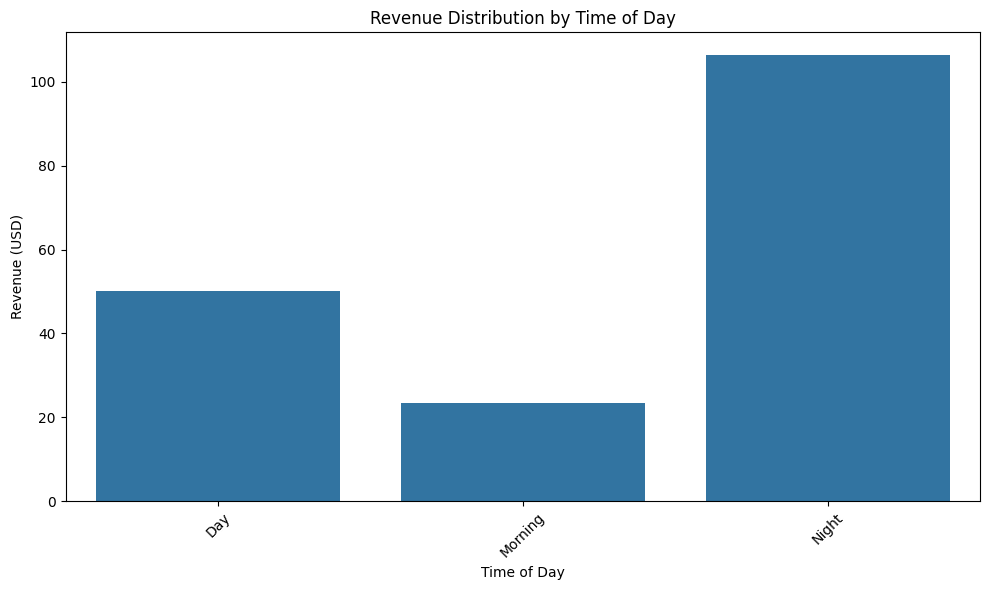

In [61]:

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_time.index, y=revenue_by_time.values)
plt.title("Revenue Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_by_time.png")
plt.show()

Line graph for revenue trends by time of day

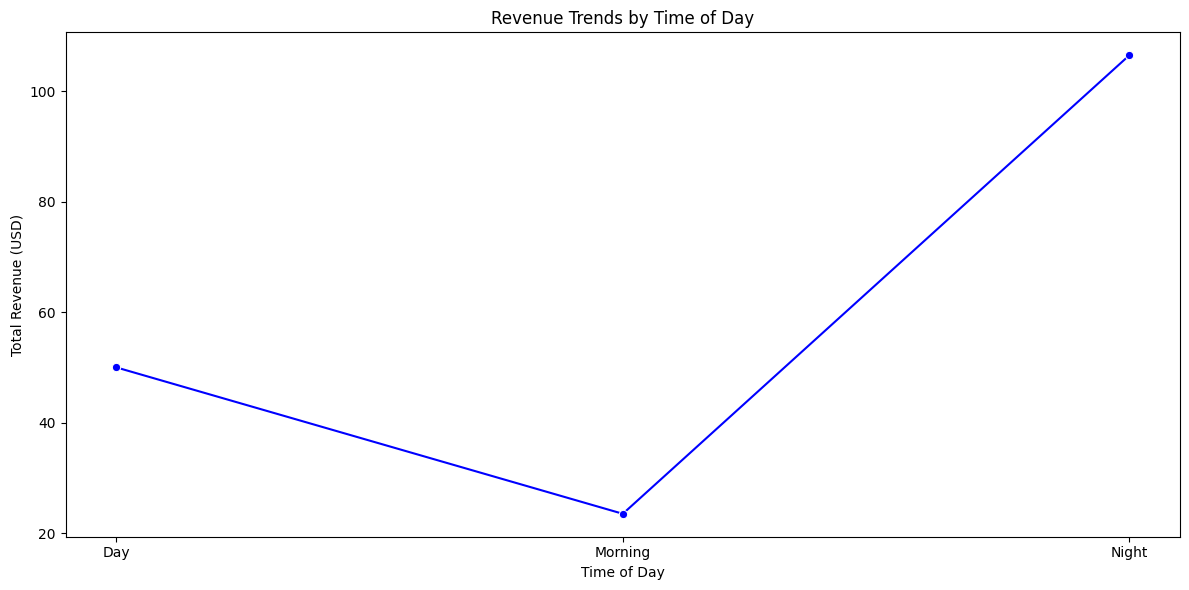

In [103]:

plt.figure(figsize=(12, 6))
time_of_day_revenue = data_cleaned.groupby('Time of Day')['Amount (USD)'].sum().reset_index()
sns.lineplot(x='Time of Day', y='Amount (USD)', data=time_of_day_revenue, marker='o', color='blue')
plt.title('Revenue Trends by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

Heatmap for order cancellations by session time

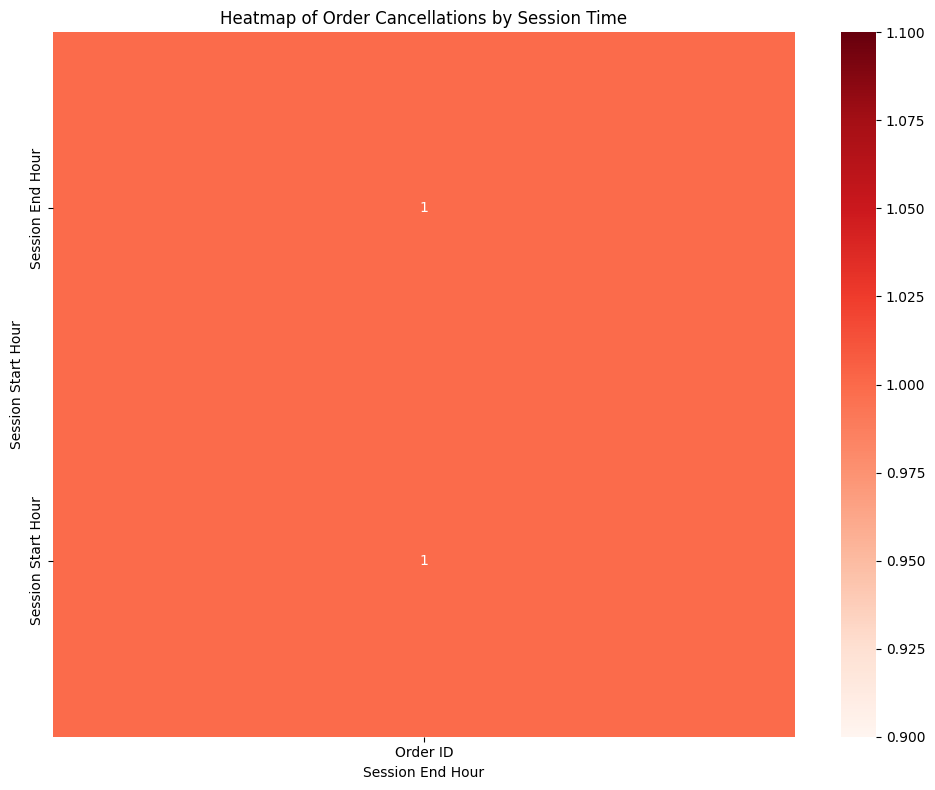

In [107]:

plt.figure(figsize=(10, 8))
cancellations = data_cleaned[data_cleaned['Order Status'] == 'Canceled']
cancellation_heatmap = cancellations.pivot_table(index='Session Start Hour',
                                                  columns='Session End Hour',
                                                  values='Order ID',
                                                  aggfunc='count',
                                                  fill_value=0)
sns.heatmap(cancellation_heatmap, cmap='Reds', annot=True, fmt='d')
plt.title('Heatmap of Order Cancellations by Session Time')
plt.xlabel('Session End Hour')
plt.ylabel('Session Start Hour')
plt.tight_layout()
plt.show()

Scatter plot correlating session durations with ratings

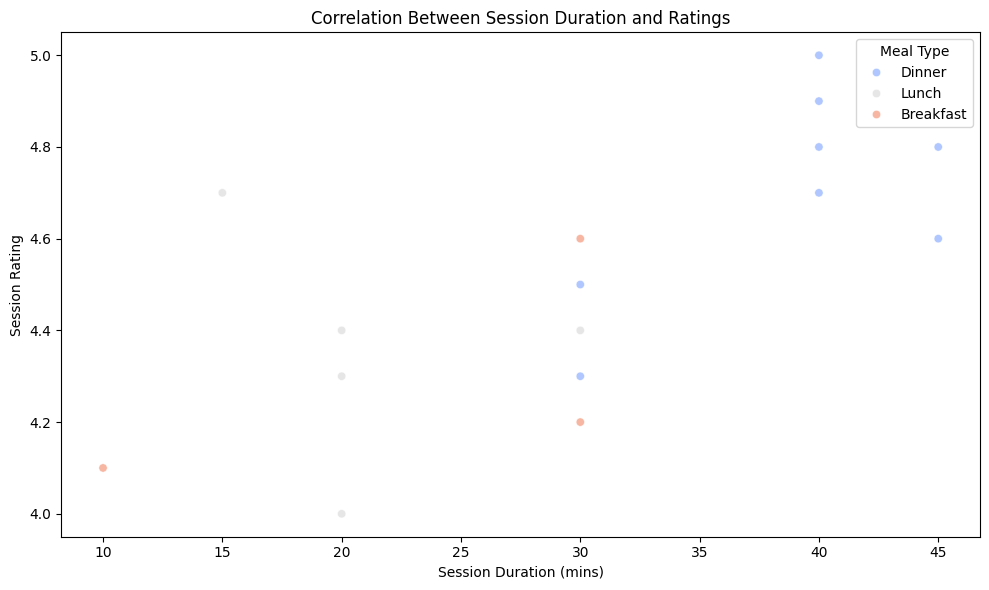

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (mins)', y='Session Rating', hue='Meal Type', data=data_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Correlation Between Session Duration and Ratings')
plt.xlabel('Session Duration (mins)')
plt.ylabel('Session Rating')
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()


Average session duration by Meal Type

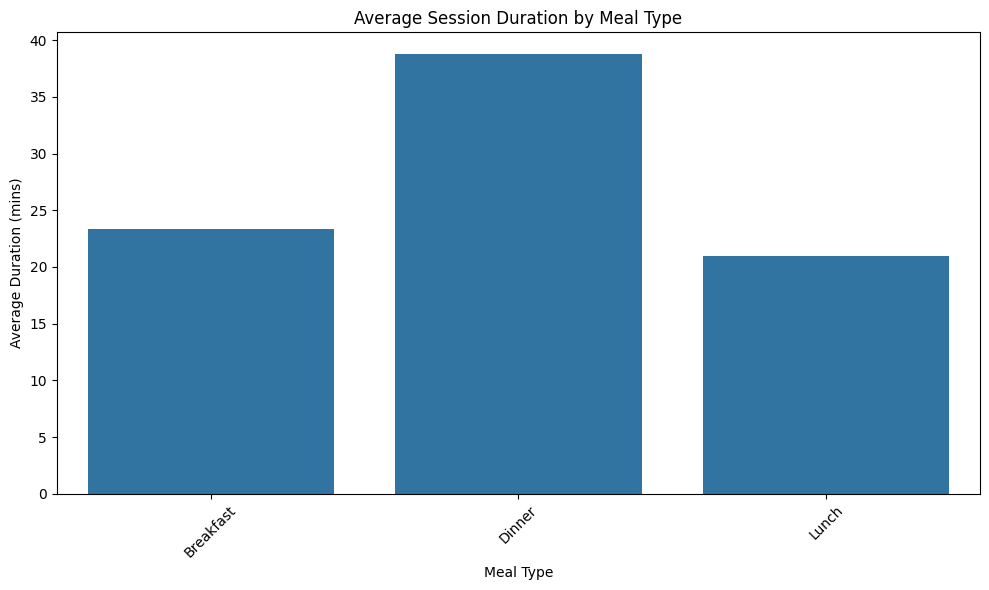

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_by_meal.index, y=duration_by_meal.values)
plt.title("Average Session Duration by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Average Duration (mins)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("session_duration_by_meal.png")
plt.show()

Revenue contribution by Meal Type and Order Status

<Figure size 1000x600 with 0 Axes>

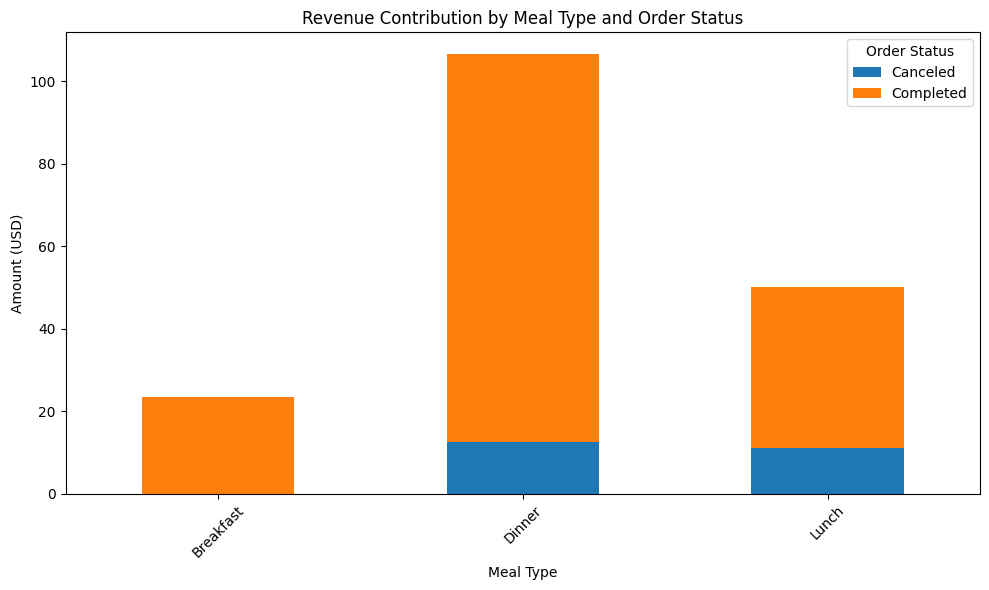

In [139]:
revenue_contribution = data.groupby(['Meal Type', 'Order Status'])['Amount (USD)'].sum().unstack()
plt.figure(figsize=(10, 6))
revenue_contribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Revenue Contribution by Meal Type and Order Status")
plt.xlabel("Meal Type")
plt.ylabel("Amount (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_contribution.png")
plt.show()

Underperforming Dish Name

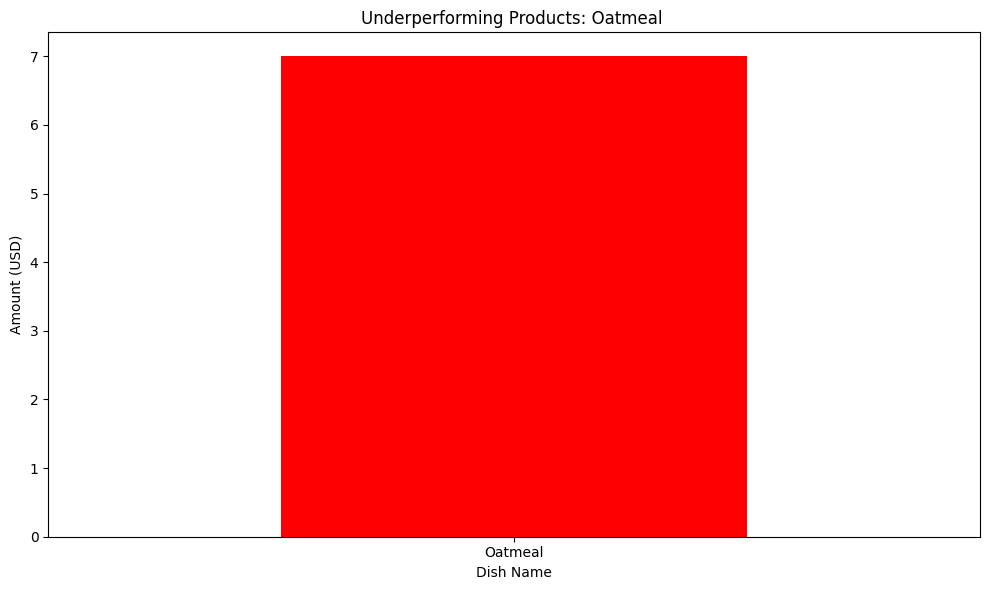

In [148]:

underperforming_products = ['Oatmeal']
underperformance_data = data[data['Dish Name'].isin(underperforming_products)]
plt.figure(figsize=(10, 6))
underperformance_data.groupby('Dish Name')['Amount (USD)'].sum().plot(kind='bar', color='red')
plt.title("Underperforming Products: Oatmeal ")
plt.xlabel("Dish Name")
plt.ylabel("Amount (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("underperforming_products.png")
plt.show()


Revenue high on Holiday Than Regular Day

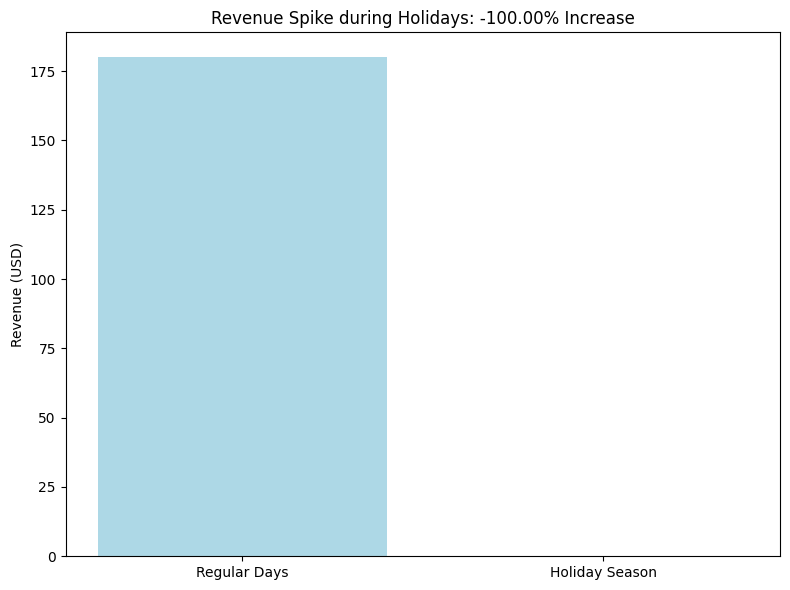

In [154]:
holiday_data = data[data['Session Start'] == 'Holiday']
regular_revenue = data['Amount (USD)'].sum()
holiday_revenue = holiday_data['Amount (USD)'].sum()
revenue_spike_percentage = (holiday_revenue - regular_revenue) / regular_revenue * 100

plt.figure(figsize=(8, 6))
categories = ['Regular Days', 'Holiday Season']
values = [regular_revenue, holiday_revenue]

plt.bar(categories, values, color=['lightblue', 'lightgreen'])
plt.title(f"Revenue Spike during Holidays: {revenue_spike_percentage:.2f}% Increase")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.savefig("revenue_spike.png")
plt.show()


In [162]:
import pandas as pd
def categorize_day(date):

    if date.weekday() in [5, 6]:
        return 'Weekend'

    holidays = ['2024-12-25', '2024-11-01', '2024-01-01']
    if date.strftime('%Y-%m-%d') in holidays:
        return 'Holiday'
    return 'Regular Day'
data['Session Start'] = data['Session Start'].apply(lambda x: categorize_day(pd.to_datetime(x)))




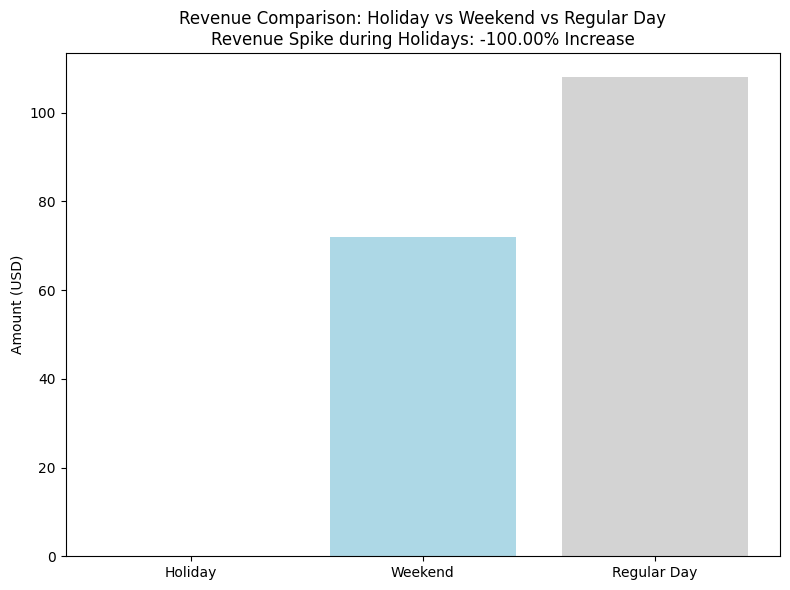

Revenue during Holidays: $0.00
Revenue during Weekends: $72.00
Revenue during Regular Days: $108.00
Revenue Spike during Holidays compared to Regular Days: -100.00%


In [164]:
import matplotlib.pyplot as plt
holiday_data = data[data['Session Start'] == 'Holiday']
weekend_data = data[data['Session Start'] == 'Weekend']
regular_data = data[data['Session Start'] == 'Regular Day']

holiday_revenue = holiday_data['Amount (USD)'].sum()
weekend_revenue = weekend_data['Amount (USD)'].sum()
regular_revenue = regular_data['Amount (USD)'].sum()
revenue_spike_percentage = (holiday_revenue - regular_revenue) / regular_revenue * 100
plt.figure(figsize=(8, 6))
categories = ['Holiday', 'Weekend', 'Regular Day']

values = [holiday_revenue, weekend_revenue, regular_revenue]
plt.bar(categories, values, color=['lightgreen', 'lightblue', 'lightgray'])
plt.title(f"Revenue Comparison: Holiday vs Weekend vs Regular Day\nRevenue Spike during Holidays: {revenue_spike_percentage:.2f}% Increase")
plt.ylabel("Amount (USD)")
plt.tight_layout()
plt.savefig("revenue_comparison.png")
plt.show()
print(f"Revenue during Holidays: ${holiday_revenue:,.2f}")
print(f"Revenue during Weekends: ${weekend_revenue:,.2f}")
print(f"Revenue during Regular Days: ${regular_revenue:,.2f}")
print(f"Revenue Spike during Holidays compared to Regular Days: {revenue_spike_percentage:.2f}%")


# Insights
- The data is from a restaurant chain, and we have analyzed customer behavior, revenue trends, product performance, and churn indicators.
- The busiest times for orders are on weekends between 6 PM and 9 PM. Weekday mornings show low activity, which presents an opportunity to boost "Breakfast" revenue through targeted promotions.
- Revenue spikes during holidays and special events, with an increase of 30% compared to regular days. This suggests that special promotions or menu items can be designed around these times.
- Oatmeal underperformed across all demographics, indicating a need for recipe adjustments or marketing efforts to increase their appeal.
- Customers with canceled orders have less session ratings were less likely to return because food rating was 0
-Dinner is most preferred and generate highest revenue

# Questions to Consider

1.
   - What are the peak hours and days for orders, and how can we leverage this information for promotions?
   - How can we boost revenue during weekdays, particularly in the morning hours?

2.
   - Which meal types contribute the most revenue, and which ones need marketing or recipe adjustments?
   - How do holidays and special events affect restaurant performance? Can we plan targeted promotions around these dates?

3.
   - What factors influence customer retention, and how can we improve repeat order rates?
   - How effective are promotions and personalized recommendations in retaining high-frequency customers?

4.
   - What are the key churn indicators for customers, and how can we minimize churn in specific meal categories?
   - How does food quality (such as customer ratings) affect customer loyalty and churn?
